In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets

((x_train, y_train), (x_test,y_test)) = datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28*28*1)
x_test = x_test.reshape(x_test.shape[0],28*28*1)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [5]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mod = Sequential()
mod.add(Dense(128, input_shape=(784,), activation='sigmoid'))
mod.add(Dense(64, activation='sigmoid'))
mod.add(Dense(10, activation='softmax'))

In [14]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(0.1)
epochs = 11
mod.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
h = mod.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=512)

Epoch 1/11
118/118 [==============================] - 4s 19ms/step - loss: 0.1197 - accuracy: 0.9655 - val_loss: 0.1251 - val_accuracy: 0.9623
Epoch 2/11
118/118 [==============================] - 2s 16ms/step - loss: 0.1075 - accuracy: 0.9689 - val_loss: 0.1162 - val_accuracy: 0.9650
Epoch 3/11
118/118 [==============================] - 2s 16ms/step - loss: 0.0977 - accuracy: 0.9718 - val_loss: 0.1107 - val_accuracy: 0.9659
Epoch 4/11
118/118 [==============================] - 2s 16ms/step - loss: 0.0894 - accuracy: 0.9748 - val_loss: 0.1041 - val_accuracy: 0.9683
Epoch 5/11
118/118 [==============================] - 2s 16ms/step - loss: 0.0817 - accuracy: 0.9771 - val_loss: 0.0990 - val_accuracy: 0.9692
Epoch 6/11
118/118 [==============================] - 2s 16ms/step - loss: 0.0747 - accuracy: 0.9793 - val_loss: 0.0934 - val_accuracy: 0.9705
Epoch 7/11
118/118 [==============================] - 2s 16ms/step - loss: 0.0692 - accuracy: 0.9807 - val_loss: 0.0909 - val_accuracy: 0.9722

In [15]:
y_pred = mod.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("accuracy: ",accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print("confusion matrix: \n", confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("classification_report: \n", classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

accuracy:  0.9602
confusion matrix: 
 [[ 969    0    1    1    0    3    2    2    2    0]
 [   0 1117    4    2    0    1    4    2    5    0]
 [   7    1  983    7    3    1    8    8   12    2]
 [   0    0    7  978    0    8    0    8    7    2]
 [   1    0    4    0  942    0    9    3    3   20]
 [   4    1    0   16    2  846    9    1    9    4]
 [   9    3    1    0    7    8  924    0    6    0]
 [   1    8   18    8    2    1    0  970    0   20]
 [   4    3    5   17    5    6    5    6  921    2]
 [   3    6    1   11   15    8    1    9    3  952]]
classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.97      0.96      0.96       982
           5       0.96      0.95      0.95       892
           6       0.96    

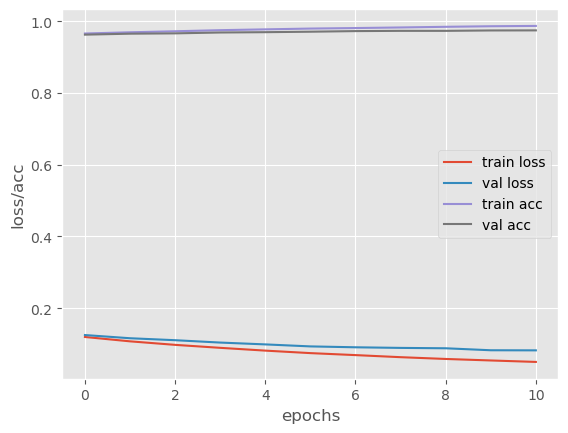

In [17]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,epochs), h.history['loss'],label="train loss")
plt.plot(np.arange(0,epochs), h.history['val_loss'], label="val loss")
plt.plot(np.arange(0,epochs), h.history['accuracy'], label="train acc")
plt.plot(np.arange(0,epochs), h.history['val_accuracy'], label='val acc')
plt.xlabel("epochs")
plt.ylabel('loss/acc')
plt.legend()